In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import  cosine_similarity
from inference_utils.pytorch_data_utils import __loadCLSembeddings__
from inference_utils.pytorch_data_utils import __loadtrainingdf__
from collections import defaultdict
 

/home/edelin/.conda/envs/trident_plot/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
train1_data = pd.read_pickle('../../../../storage/shared/master_thesis_TRIDENT/TRIDENT_for_Elin/TRIDENT_fish_EC50_10foldCV_35epochs_for_Elin/without_duration/fold1_seed41_training_results_final_epoch.pkl.zip',compression='zip')
val1_data = pd.read_pickle('../../../../storage/shared/master_thesis_TRIDENT/TRIDENT_for_Elin/TRIDENT_fish_EC50_10foldCV_35epochs_for_Elin/without_duration/fold1_seed41_validation_results_final_epoch.pkl.zip',compression='zip')
train2_data = pd.read_pickle('../../../../storage/shared/master_thesis_TRIDENT/TRIDENT_for_Elin/TRIDENT_fish_EC50_10foldCV_35epochs_for_Elin/without_duration/fold2_seed41_training_results_final_epoch.pkl.zip',compression='zip')
val2_data = pd.read_pickle('../../../../storage/shared/master_thesis_TRIDENT/TRIDENT_for_Elin/TRIDENT_fish_EC50_10foldCV_35epochs_for_Elin/without_duration/fold2_seed41_validation_results_final_epoch.pkl.zip',compression='zip')
train3_data = pd.read_pickle('../../../../storage/shared/master_thesis_TRIDENT/TRIDENT_for_Elin/TRIDENT_fish_EC50_10foldCV_35epochs_for_Elin/without_duration/fold3_seed41_training_results_final_epoch.pkl.zip',compression='zip')
val3_data = pd.read_pickle('../../../../storage/shared/master_thesis_TRIDENT/TRIDENT_for_Elin/TRIDENT_fish_EC50_10foldCV_35epochs_for_Elin/without_duration/fold3_seed41_validation_results_final_epoch.pkl.zip',compression='zip')
train4_data = pd.read_pickle('../../../../storage/shared/master_thesis_TRIDENT/TRIDENT_for_Elin/TRIDENT_fish_EC50_10foldCV_35epochs_for_Elin/without_duration/fold4_seed41_training_results_final_epoch.pkl.zip',compression='zip')
val4_data = pd.read_pickle('../../../../storage/shared/master_thesis_TRIDENT/TRIDENT_for_Elin/TRIDENT_fish_EC50_10foldCV_35epochs_for_Elin/without_duration/fold4_seed41_validation_results_final_epoch.pkl.zip',compression='zip')
train5_data = pd.read_pickle('../../../../storage/shared/master_thesis_TRIDENT/TRIDENT_for_Elin/TRIDENT_fish_EC50_10foldCV_35epochs_for_Elin/without_duration/fold5_seed41_training_results_final_epoch.pkl.zip',compression='zip')
val5_data = pd.read_pickle('../../../../storage/shared/master_thesis_TRIDENT/TRIDENT_for_Elin/TRIDENT_fish_EC50_10foldCV_35epochs_for_Elin/without_duration/fold5_seed41_validation_results_final_epoch.pkl.zip',compression='zip')
train6_data = pd.read_pickle('../../../../storage/shared/master_thesis_TRIDENT/TRIDENT_for_Elin/TRIDENT_fish_EC50_10foldCV_35epochs_for_Elin/without_duration/fold6_seed41_training_results_final_epoch.pkl.zip',compression='zip')
val6_data = pd.read_pickle('../../../../storage/shared/master_thesis_TRIDENT/TRIDENT_for_Elin/TRIDENT_fish_EC50_10foldCV_35epochs_for_Elin/without_duration/fold6_seed41_validation_results_final_epoch.pkl.zip',compression='zip')
train7_data = pd.read_pickle('../../../../storage/shared/master_thesis_TRIDENT/TRIDENT_for_Elin/TRIDENT_fish_EC50_10foldCV_35epochs_for_Elin/without_duration/fold7_seed41_training_results_final_epoch.pkl.zip',compression='zip')
val7_data = pd.read_pickle('../../../../storage/shared/master_thesis_TRIDENT/TRIDENT_for_Elin/TRIDENT_fish_EC50_10foldCV_35epochs_for_Elin/without_duration/fold7_seed41_validation_results_final_epoch.pkl.zip',compression='zip')
train8_data = pd.read_pickle('../../../../storage/shared/master_thesis_TRIDENT/TRIDENT_for_Elin/TRIDENT_fish_EC50_10foldCV_35epochs_for_Elin/without_duration/fold8_seed41_training_results_final_epoch.pkl.zip',compression='zip')
val8_data = pd.read_pickle('../../../../storage/shared/master_thesis_TRIDENT/TRIDENT_for_Elin/TRIDENT_fish_EC50_10foldCV_35epochs_for_Elin/without_duration/fold8_seed41_validation_results_final_epoch.pkl.zip',compression='zip')
train9_data = pd.read_pickle('../../../../storage/shared/master_thesis_TRIDENT/TRIDENT_for_Elin/TRIDENT_fish_EC50_10foldCV_35epochs_for_Elin/without_duration/fold9_seed41_training_results_final_epoch.pkl.zip',compression='zip')
val9_data = pd.read_pickle('../../../../storage/shared/master_thesis_TRIDENT/TRIDENT_for_Elin/TRIDENT_fish_EC50_10foldCV_35epochs_for_Elin/without_duration/fold9_seed41_validation_results_final_epoch.pkl.zip',compression='zip')
train10_data = pd.read_pickle('../../../../storage/shared/master_thesis_TRIDENT/TRIDENT_for_Elin/TRIDENT_fish_EC50_10foldCV_35epochs_for_Elin/without_duration/fold10_seed41_training_results_final_epoch.pkl.zip',compression='zip')
val10_data = pd.read_pickle('../../../../storage/shared/master_thesis_TRIDENT/TRIDENT_for_Elin/TRIDENT_fish_EC50_10foldCV_35epochs_for_Elin/without_duration/fold10_seed41_validation_results_final_epoch.pkl.zip',compression='zip')


In [40]:

train1_emb = pd.read_pickle('../../../../storage/shared/master_thesis_TRIDENT/TRIDENT_for_Elin/TRIDENT_fish_EC50_10foldCV_35epochs_for_Elin/fold1_seed41_training_SMILES_to_CLS_final_epoch.pkl.zip',compression='zip')
val1_emb = pd.read_pickle('../../../../storage/shared/master_thesis_TRIDENT/TRIDENT_for_Elin/TRIDENT_fish_EC50_10foldCV_35epochs_for_Elin/fold1_seed41_validation_SMILES_to_CLS_final_epoch.pkl.zip',compression='zip')
train2_emb = pd.read_pickle('../../../../storage/shared/master_thesis_TRIDENT/TRIDENT_for_Elin/TRIDENT_fish_EC50_10foldCV_35epochs_for_Elin/fold2_seed41_training_SMILES_to_CLS_final_epoch.pkl.zip',compression='zip')
val2_emb = pd.read_pickle('../../../../storage/shared/master_thesis_TRIDENT/TRIDENT_for_Elin/TRIDENT_fish_EC50_10foldCV_35epochs_for_Elin/fold2_seed41_validation_SMILES_to_CLS_final_epoch.pkl.zip',compression='zip')
train3_emb = pd.read_pickle('../../../../storage/shared/master_thesis_TRIDENT/TRIDENT_for_Elin/TRIDENT_fish_EC50_10foldCV_35epochs_for_Elin/fold3_seed41_training_SMILES_to_CLS_final_epoch.pkl.zip',compression='zip')
val3_emb = pd.read_pickle('../../../../storage/shared/master_thesis_TRIDENT/TRIDENT_for_Elin/TRIDENT_fish_EC50_10foldCV_35epochs_for_Elin/fold3_seed41_validation_SMILES_to_CLS_final_epoch.pkl.zip',compression='zip')
train4_emb = pd.read_pickle('../../../../storage/shared/master_thesis_TRIDENT/TRIDENT_for_Elin/TRIDENT_fish_EC50_10foldCV_35epochs_for_Elin/fold4_seed41_training_SMILES_to_CLS_final_epoch.pkl.zip',compression='zip')
val4_emb = pd.read_pickle('../../../../storage/shared/master_thesis_TRIDENT/TRIDENT_for_Elin/TRIDENT_fish_EC50_10foldCV_35epochs_for_Elin/fold4_seed41_validation_SMILES_to_CLS_final_epoch.pkl.zip',compression='zip')
train5_emb = pd.read_pickle('../../../../storage/shared/master_thesis_TRIDENT/TRIDENT_for_Elin/TRIDENT_fish_EC50_10foldCV_35epochs_for_Elin/fold5_seed41_training_SMILES_to_CLS_final_epoch.pkl.zip',compression='zip')
val5_emb = pd.read_pickle('../../../../storage/shared/master_thesis_TRIDENT/TRIDENT_for_Elin/TRIDENT_fish_EC50_10foldCV_35epochs_for_Elin/fold5_seed41_validation_SMILES_to_CLS_final_epoch.pkl.zip',compression='zip')
train6_emb = pd.read_pickle('../../../../storage/shared/master_thesis_TRIDENT/TRIDENT_for_Elin/TRIDENT_fish_EC50_10foldCV_35epochs_for_Elin/fold6_seed41_training_SMILES_to_CLS_final_epoch.pkl.zip',compression='zip')
val6_emb = pd.read_pickle('../../../../storage/shared/master_thesis_TRIDENT/TRIDENT_for_Elin/TRIDENT_fish_EC50_10foldCV_35epochs_for_Elin/fold6_seed41_validation_SMILES_to_CLS_final_epoch.pkl.zip',compression='zip')
train7_emb = pd.read_pickle('../../../../storage/shared/master_thesis_TRIDENT/TRIDENT_for_Elin/TRIDENT_fish_EC50_10foldCV_35epochs_for_Elin/fold7_seed41_training_SMILES_to_CLS_final_epoch.pkl.zip',compression='zip')
val7_emb = pd.read_pickle('../../../../storage/shared/master_thesis_TRIDENT/TRIDENT_for_Elin/TRIDENT_fish_EC50_10foldCV_35epochs_for_Elin/fold7_seed41_validation_SMILES_to_CLS_final_epoch.pkl.zip',compression='zip')
train8_emb = pd.read_pickle('../../../../storage/shared/master_thesis_TRIDENT/TRIDENT_for_Elin/TRIDENT_fish_EC50_10foldCV_35epochs_for_Elin/fold8_seed41_training_SMILES_to_CLS_final_epoch.pkl.zip',compression='zip')
val8_emb = pd.read_pickle('../../../../storage/shared/master_thesis_TRIDENT/TRIDENT_for_Elin/TRIDENT_fish_EC50_10foldCV_35epochs_for_Elin/fold8_seed41_validation_SMILES_to_CLS_final_epoch.pkl.zip',compression='zip')
train9_emb = pd.read_pickle('../../../../storage/shared/master_thesis_TRIDENT/TRIDENT_for_Elin/TRIDENT_fish_EC50_10foldCV_35epochs_for_Elin/fold9_seed41_training_SMILES_to_CLS_final_epoch.pkl.zip',compression='zip')
val9_emb = pd.read_pickle('../../../../storage/shared/master_thesis_TRIDENT/TRIDENT_for_Elin/TRIDENT_fish_EC50_10foldCV_35epochs_for_Elin/fold9_seed41_validation_SMILES_to_CLS_final_epoch.pkl.zip',compression='zip')
train10_emb = pd.read_pickle('../../../../storage/shared/master_thesis_TRIDENT/TRIDENT_for_Elin/TRIDENT_fish_EC50_10foldCV_35epochs_for_Elin/fold10_seed41_training_SMILES_to_CLS_final_epoch.pkl.zip',compression='zip')
val10_emb = pd.read_pickle('../../../../storage/shared/master_thesis_TRIDENT/TRIDENT_for_Elin/TRIDENT_fish_EC50_10foldCV_35epochs_for_Elin/fold10_seed41_validation_SMILES_to_CLS_final_epoch.pkl.zip',compression='zip')


In [41]:
train1=pd.merge(train1_data,train1_emb,on='SMILES_Canonical_RDKit')
train2=pd.merge(train2_data,train2_emb,on='SMILES_Canonical_RDKit')
train3=pd.merge(train3_data,train3_emb,on='SMILES_Canonical_RDKit')
train4=pd.merge(train4_data,train4_emb,on='SMILES_Canonical_RDKit')
train5=pd.merge(train5_data,train5_emb,on='SMILES_Canonical_RDKit')
train6=pd.merge(train6_data,train6_emb,on='SMILES_Canonical_RDKit')
train7=pd.merge(train7_data,train7_emb,on='SMILES_Canonical_RDKit')
train8=pd.merge(train8_data,train8_emb,on='SMILES_Canonical_RDKit')
train9=pd.merge(train9_data,train9_emb,on='SMILES_Canonical_RDKit')
train10=pd.merge(train10_data,train10_emb,on='SMILES_Canonical_RDKit')

val1=pd.merge(val1_data,val1_emb,on='SMILES_Canonical_RDKit')
val2=pd.merge(val2_data,val2_emb,on='SMILES_Canonical_RDKit')
val3=pd.merge(val3_data,val3_emb,on='SMILES_Canonical_RDKit')
val4=pd.merge(val4_data,val4_emb,on='SMILES_Canonical_RDKit')
val5=pd.merge(val5_data,val5_emb,on='SMILES_Canonical_RDKit')
val6=pd.merge(val6_data,val6_emb,on='SMILES_Canonical_RDKit')
val7=pd.merge(val7_data,val7_emb,on='SMILES_Canonical_RDKit')
val8=pd.merge(val8_data,val8_emb,on='SMILES_Canonical_RDKit')
val9=pd.merge(val9_data,val9_emb,on='SMILES_Canonical_RDKit')
val10=pd.merge(val10_data,val10_emb,on='SMILES_Canonical_RDKit')

In [42]:

# Put together for easier handling
dataframes = {
    "train": [train1, train2, train3, train4, train5, train6, train7, train8, train9, train10],
    "val": [val1, val2, val3, val4, val5, val6, val7, val8, val9, val10]
}


In [43]:

# Get residuals and L1 
residuals = {"train": [], "val": []}
L1 = {"train": [], "val": []}

for key, df_list in dataframes.items():
    for df in df_list:
        df_residuals = df['labels'] - df['preds']
        
        L1_fold = np.abs(df_residuals)
        
        residuals[key].append(df_residuals)
        L1[key].append(L1_fold)



Add to the validation folds their closeness to the training and their error

In [44]:
for i in range(10):
    dataframes['val'][i]['pred_L1_error']=L1['val'][i]

In [45]:
for i in range(10):
    embeddings_train_fold=np.asarray(dataframes['train'][i].CLS_embeddings.tolist(), dtype=np.float32)
    embeddings_val_fold=np.asarray(dataframes['val'][i].CLS_embeddings.tolist(), dtype=np.float32)
    dataframes['val'][i]['distance_to_training'] = np.nan

    for j in range(len(embeddings_val_fold)):
        embeddings_val_fold_current=embeddings_val_fold[j].reshape(1, -1)
        similarity=cosine_similarity(embeddings_train_fold,embeddings_val_fold_current).mean()
        dataframes['val'][i].at[j, 'distance_to_training'] = similarity

In [46]:
def threshold_calculator(val_data,nr_batches):
    cosine_sim_in_data=val_data['distance_to_training']
    cosine_thresholds = np.quantile(cosine_sim_in_data,q=np.linspace(0,1,nr_batches))
    cosine_thresholds[0] = -1.0
    cosine_thresholds_w_1=np.append(cosine_thresholds,1.0)
    return cosine_thresholds_w_1
    




In [47]:
s={}
for i in range(10):
    s[i]=threshold_calculator(dataframes['val'][i],10)

stacked_arrays = np.vstack([s[i] for i in s])
mean_thresholds = stacked_arrays.mean(axis=0)


In [48]:


def heatmap_grid_values(val_data,training_data):
    error_collection = defaultdict(list) # collect the error values for the heatmap
    count_collection = defaultdict(list) # collect the counts for the heatmap
    similarity_values=mean_thresholds#threshold_calculator(val_data,batch_number)
    errors=val_data['pred_L1_error'] # L1 error values for each embedding
    embeddings=np.asarray(val_data.CLS_embeddings.tolist(), dtype=np.float32) # embeddings from the validation fold (for current val fold in the loop later)
    training_embeddings=np.asarray(training_data.CLS_embeddings.tolist(), dtype=np.float32) # embeddings from the training fold
    for i in range(len(val_data)):
        current_embedding = embeddings[i].reshape(1, -1)  # Get the current embedding in the validation fold
        cossim = cosine_similarity(training_embeddings, current_embedding).flatten() 
        for threshold_index in range(len(similarity_values)-1):
            threshold_u=similarity_values[threshold_index+1] # get the upper bound of the cosine range
            threshold_l=similarity_values[threshold_index] 
            accepted_indices = np.where((threshold_l<cossim)&(cossim <= threshold_u))[0] # get which embeddings in training are within the cosine threshold of the current embedding
            number_of_embeddings_in_range=len(accepted_indices)
            if accepted_indices.size > 0:
                error_current = errors[i]#np.mean(errors[range_indices])
                error_collection[(i, threshold_u)].append(error_current)
                error_collection[(i,threshold_u)].append(number_of_embeddings_in_range)
                count_collection[threshold_u].append(number_of_embeddings_in_range)
            else:
                error_collection[(i, threshold_u)].append(None)
                count_collection[threshold_u].append(0)
         
    return error_collection,count_collection


In [49]:
error_collection={}
count_collection={}

In [50]:
for i in range(10):
    error_collection[i], count_collection[i] = heatmap_grid_values(val_data=dataframes['val'][i],training_data=dataframes['train'][i])

In [51]:
# Initialize thresholds dictionaries
thresholds_neighbors = {i: {} for i in range(1, 11)}

# Calculate percentiles for each neighbor and each count_collection index
for neighbor_idx in range(1, 11):
    for count_idx in range(10):
        thresholds_neighbors[neighbor_idx][count_idx] = np.percentile(
            pd.DataFrame(list(count_collection[count_idx].items()))[1][neighbor_idx - 1],
            np.linspace(0, 100, 11)
        )



In [52]:


# Compute mean thresholds for each neighbor
mean_thresholds_neighbors = {}
for neighbor_idx in range(1, 11):
    stacked_arrays = np.vstack([thresholds_neighbors[neighbor_idx][i] for i in thresholds_neighbors[neighbor_idx]])
    mean_thresholds_neighbors[neighbor_idx] = stacked_arrays.mean(axis=0, dtype=np.int32)


In [ ]:

# Define cosine bins once
cosine_bins = {mean_thresholds[i]: mean_thresholds_neighbors[i] for i in range(1, 11)}

# Define the binning function
def binning(row):
    bins = cosine_bins[row['Cosine Threshold']]  
    bin_labels = [f"{i}-{i+1}" for i in range(len(bins) - 1)]
    return pd.cut([row['Neighbor count']], bins=bins, labels=bin_labels, include_lowest=True)[0]

# Function to process a single fold
def process_fold(fold_index):
    error_df = pd.DataFrame(
        list(error_collection[fold_index].items()), 
        columns=['Emb-Threshold Combo', 'Error and neighbor count']
    )
    
    # Filter out invalid rows
    error_df = error_df[error_df['Error and neighbor count'].apply(lambda x: isinstance(x, (list, tuple)) and len(x) >= 2)]
    
    # Extract Error and Neighbor count
    error_df['Error'] = error_df['Error and neighbor count'].apply(lambda x: x[0])
    error_df['Neighbor count'] = error_df['Error and neighbor count'].apply(lambda x: x[1])
    
    # Split 'Emb-Threshold Combo' into separate columns
    error_df[['Emb index', 'Cosine Threshold']] = pd.DataFrame(
        error_df['Emb-Threshold Combo'].tolist(), index=error_df.index
    )
    
    # Drop unnecessary columns
    error_df = error_df.drop(columns=['Emb-Threshold Combo', 'Error and neighbor count'])
    
    # Apply binning
    error_df['Neighbor count group'] = error_df.apply(binning, axis=1)
    
    # Group and calculate the mean error
    grouped_df = error_df.groupby(['Cosine Threshold', 'Neighbor count group'])['Error'].mean().reset_index()

    # Pivot data for final output
    pivot_data = grouped_df.pivot(index='Cosine Threshold', columns='Neighbor count group', values='Error')
    pivot_data = pivot_data.sort_index(axis=0)  # Sort rows by cosine threshold
    return pivot_data

# Process all folds in a loop
pivot_data_list = [process_fold(i) for i in range(10)]


In [54]:


counts=np.zeros((10,10))
for fold in range(10): # go through every fold
    fold_count_values=pd.DataFrame(list(count_collection[fold].items())) # get neighbor count for every obs in the cosine ranges (rows9)
    for row in range(1,11): # (go throung the rows, cosine ranges)
        threshold_values=mean_thresholds_neighbors[row] # get the mean percentiles for this cosine range/ row
        for j in range(len(threshold_values)-1): # get the percentile boundaries 
            l = threshold_values[j]      # Lower bound
            u = threshold_values[j + 1]  # Upper bound
            counter=0 # count the obs in the cosine range that fall between the lower and upper bound
            for obs in range(len(fold_count_values[1][row-1])): # go through the observations within the cosine range
                neighbor_count_obs=fold_count_values[1][row-1][obs] # get the neighbor count of the current observation
                if l<=neighbor_count_obs<u: # check if count for observation is between the upper anf lower bounds
                    counter=counter+1 # if the count for the observation is between the bounds add to the counter
            counts[row-1, j]=counts[row-1,j]+counter # add the counts from this row-column combo to the count matrix 
    


In [55]:
counts
count_df = pd.DataFrame(counts)


In [56]:
a= pivot_data_list[0]+pivot_data_list[1]+pivot_data_list[2]+pivot_data_list[3]+pivot_data_list[4]+pivot_data_list[5]+pivot_data_list[6]+pivot_data_list[7]+pivot_data_list[8]+pivot_data_list[9]
b=a/10
b

Neighbor count group,0-1,1-2,2-3,3-4,4-5,5-6,6-7,7-8,8-9,9-10
Cosine Threshold,,,,,,,,,,
0.046746,0.623794,0.590099,0.684776,0.619066,0.613549,0.620538,0.541538,0.579488,0.708030,0.873508
0.141561,0.546215,0.510409,0.577387,0.609135,0.644963,0.724724,0.681361,0.724628,0.708880,0.735744
0.216938,0.564277,0.551618,0.578656,0.600533,0.689328,0.717471,0.694118,0.692713,0.612707,0.803434
0.265453,0.631390,0.561098,0.575498,0.620293,0.693331,0.729216,0.643579,0.685909,0.694375,0.694575
0.296156,0.624159,0.643720,0.584623,0.614327,0.628874,0.707998,0.665878,0.645874,0.681363,0.708770
0.316220,0.719760,0.565016,0.576464,0.555955,0.669110,0.760231,0.658303,0.657869,0.643726,0.675987
0.333370,0.691723,0.591898,0.587129,0.617217,0.642550,0.756576,0.655713,0.626878,0.662706,0.682029
0.352961,0.769874,0.596038,0.585910,0.594034,0.637448,0.756400,0.666286,0.571746,0.644129,0.684036
0.391827,0.753095,0.589683,0.615780,0.562403,0.672430,0.770219,0.650377,0.625221,0.600617,0.656375


In [57]:
count_df

,0,1,2,3,4,5,6,7,8,9
0,358.0,330.0,363.0,348.0,370.0,337.0,348.0,383.0,318.0,369.0
1,348.0,317.0,295.0,417.0,362.0,359.0,368.0,356.0,352.0,355.0
2,357.0,334.0,371.0,313.0,355.0,378.0,368.0,331.0,374.0,348.0
3,356.0,334.0,332.0,361.0,376.0,337.0,357.0,349.0,364.0,364.0
4,307.0,366.0,323.0,355.0,433.0,332.0,345.0,344.0,369.0,357.0
5,333.0,317.0,335.0,377.0,405.0,344.0,338.0,344.0,351.0,388.0
6,302.0,300.0,344.0,402.0,395.0,357.0,354.0,331.0,376.0,367.0
7,286.0,332.0,332.0,420.0,371.0,345.0,379.0,325.0,372.0,369.0
8,335.0,342.0,374.0,352.0,349.0,360.0,358.0,321.0,370.0,371.0
9,369.0,354.0,319.0,374.0,345.0,377.0,337.0,338.0,318.0,384.0


In [58]:
b


Neighbor count group,0-1,1-2,2-3,3-4,4-5,5-6,6-7,7-8,8-9,9-10
Cosine Threshold,,,,,,,,,,
0.046746,0.623794,0.590099,0.684776,0.619066,0.613549,0.620538,0.541538,0.579488,0.708030,0.873508
0.141561,0.546215,0.510409,0.577387,0.609135,0.644963,0.724724,0.681361,0.724628,0.708880,0.735744
0.216938,0.564277,0.551618,0.578656,0.600533,0.689328,0.717471,0.694118,0.692713,0.612707,0.803434
0.265453,0.631390,0.561098,0.575498,0.620293,0.693331,0.729216,0.643579,0.685909,0.694375,0.694575
0.296156,0.624159,0.643720,0.584623,0.614327,0.628874,0.707998,0.665878,0.645874,0.681363,0.708770
0.316220,0.719760,0.565016,0.576464,0.555955,0.669110,0.760231,0.658303,0.657869,0.643726,0.675987
0.333370,0.691723,0.591898,0.587129,0.617217,0.642550,0.756576,0.655713,0.626878,0.662706,0.682029
0.352961,0.769874,0.596038,0.585910,0.594034,0.637448,0.756400,0.666286,0.571746,0.644129,0.684036
0.391827,0.753095,0.589683,0.615780,0.562403,0.672430,0.770219,0.650377,0.625221,0.600617,0.656375


/tmp/ipykernel_104055/1431722188.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Error: 0.62
Count: 358' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  combined_annot.loc[row, col] = f"Error: {error_val:.2f}\nCount: {int(count_val)}" if pd.notna(error_val) else ""
/tmp/ipykernel_104055/1431722188.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Error: 0.59
Count: 330' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  combined_annot.loc[row, col] = f"Error: {error_val:.2f}\nCount: {int(count_val)}" if pd.notna(error_val) else ""
/tmp/ipykernel_104055/1431722188.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Error: 0.68
Count: 363' has dtype incomp

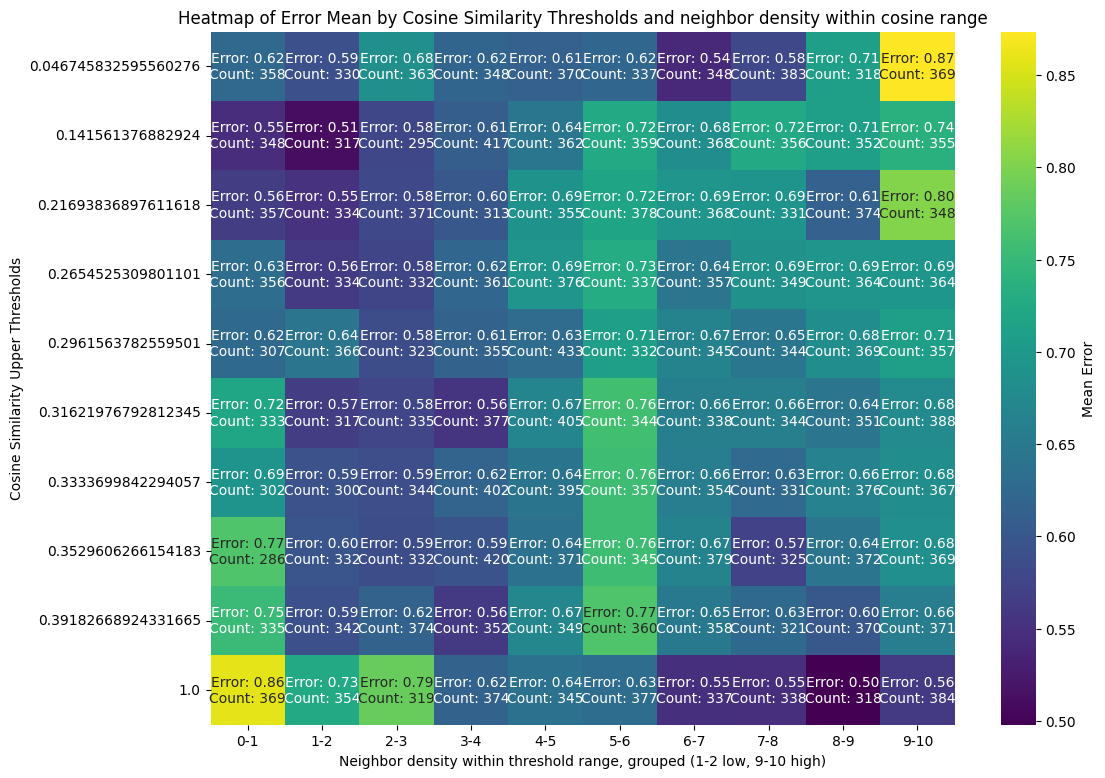

<Figure size 640x480 with 0 Axes>

In [59]:
count_df=pd.DataFrame(counts)
combined_annot = pd.DataFrame(np.zeros((10,10)))
for row in combined_annot.index:
    for col in combined_annot.columns:
        error_val = b.iloc[row, col]
        count_val = count_df.iloc[row, col]
        combined_annot.loc[row, col] = f"Error: {error_val:.2f}\nCount: {int(count_val)}" if pd.notna(error_val) else ""

# Plot 
fig=plt.figure(figsize=(12, 9))
sns.heatmap(b, cmap='viridis', fmt="", cbar_kws={'label': 'Mean Error'}, annot=combined_annot)
plt.xlabel("Neighbor density within threshold range, grouped (1-2 low, 9-10 high)")
plt.ylabel("Cosine Similarity Upper Thresholds")
plt.title("Heatmap of Error Mean by Cosine Similarity Thresholds and neighbor density within cosine range")
plt.show()

plt.savefig("heatmap_fig.pdf",format='pdf')

In [60]:
fig.savefig("heatmap_fig.pdf",format='pdf')